In [52]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')
my_colors = ['lightblue','orange','crimson']

In [6]:
#Carga de datos
data = pd.read_csv('data/clean_Data.csv')
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [8]:
corr_matrix = data.corr()
corr_matrix.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
geo_level_1_id,-0.00,1.00,-0.06,0.00,-0.09,-0.00,0.07,-0.06,-0.02,-0.15,...,0.00,0.02,0.00,0.00,0.00,-0.00,0.00,0.00,-0.02,-0.07
geo_level_2_id,0.00,-0.06,1.00,0.00,0.05,0.01,-0.05,0.04,0.02,0.08,...,-0.01,-0.03,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.01,0.04
geo_level_3_id,-0.00,0.00,0.00,1.00,-0.02,-0.01,-0.01,-0.02,-0.02,0.03,...,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01
count_floors_pre_eq,-0.00,-0.09,0.05,-0.02,1.00,0.09,0.10,0.77,0.17,-0.03,...,0.08,0.04,0.02,0.01,-0.00,0.01,0.01,0.00,-0.00,0.12


In [9]:
columns_for_correlation = data.columns.to_list()
columns_for_correlation.remove('building_id')
columns_for_correlation.remove('damage_grade')
columns_for_correlation

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [10]:
data['other_floor_type'] = data['other_floor_type'].astype('category')
print(data['other_floor_type'].unique())
data['other_floor_type'].cat.categories = [1,2,3,4]
data['other_floor_type'] = data['other_floor_type'].astype('float')
data[['other_floor_type', 'damage_grade']].corr()

[q, x, j, s]
Categories (4, object): [q, x, j, s]


,other_floor_type,damage_grade
other_floor_type,1.00,0.04
damage_grade,0.04,1.00


In [20]:
data['foundation_type'] = data['foundation_type'].astype('category')
print(data['foundation_type'].unique())
data['foundation_type'].cat.categories = [1,2,3,4,5]
data['foundation_type'] = data['foundation_type'].astype('float')
data[['foundation_type', 'damage_grade']].corr()

[r, w, i, u, h]
Categories (5, object): [r, w, i, u, h]


,foundation_type,damage_grade
foundation_type,1.00,-0.10
damage_grade,-0.10,1.00


In [21]:
data['legal_ownership_status'] = data['legal_ownership_status'].astype('category')
print(data['legal_ownership_status'].unique())
data['legal_ownership_status'].cat.categories = [1,2,3,4]
data['legal_ownership_status'] = data['legal_ownership_status'].astype('float')
data[['legal_ownership_status', 'damage_grade']].corr()

[3.00, 1.00, 2.00, 4.00]
Categories (4, float64): [3.00, 1.00, 2.00, 4.00]


,legal_ownership_status,damage_grade
legal_ownership_status,1.00,0.09
damage_grade,0.09,1.00


In [22]:
data['plan_configuration'] = data['plan_configuration'].astype('category')
print(data['plan_configuration'].unique())
data['plan_configuration'].cat.categories = [1,2,3,4,5,6,7,8,9,10]
data['plan_configuration'] = data['plan_configuration'].astype('float')
data[['plan_configuration', 'damage_grade']].corr()

[3.00, 10.00, 9.00, 8.00, 5.00, 2.00, 1.00, 6.00, 4.00, 7.00]
Categories (10, float64): [3.00, 10.00, 9.00, 8.00, ..., 1.00, 6.00, 4.00, 7.00]


,plan_configuration,damage_grade
plan_configuration,1.00,-0.04
damage_grade,-0.04,1.00


In [23]:
data['position'] = data['position'].astype('category')
print(data['position'].unique())
data['position'].cat.categories = [1,2,3,4]
data['position'] = data['position'].astype('float')
data[['position', 'damage_grade']].corr()

[4.00, 3.00, 1.00, 2.00]
Categories (4, float64): [4.00, 3.00, 1.00, 2.00]


,position,damage_grade
position,1.00,0.06
damage_grade,0.06,1.00


In [24]:
data['ground_floor_type'] = data['ground_floor_type'].astype('category')
print(data['ground_floor_type'].unique())
data['ground_floor_type'].cat.categories = [1,2,3,4,5]
data['ground_floor_type'] = data['ground_floor_type'].astype('float')
data[['ground_floor_type', 'damage_grade']].corr()

[1.00, 4.00, 3.00, 5.00, 2.00]
Categories (5, float64): [1.00, 4.00, 3.00, 5.00, 2.00]


,ground_floor_type,damage_grade
ground_floor_type,1.00,-0.18
damage_grade,-0.18,1.00


In [25]:
data['roof_type'] = data['roof_type'].astype('category')
print(data['roof_type'].unique())
data['roof_type'].cat.categories = [1,2,3]
data['roof_type'] = data['roof_type'].astype('float')
data[['roof_type', 'damage_grade']].corr()

[1.00, 2.00, 3.00]
Categories (3, float64): [1.00, 2.00, 3.00]


,roof_type,damage_grade
roof_type,1.00,-0.17
damage_grade,-0.17,1.00


In [26]:
data['land_surface_condition'] = data['land_surface_condition'].astype('category')
print(data['land_surface_condition'].unique())
data['land_surface_condition'].cat.categories = [1,2,3]
data['land_surface_condition'] = data['land_surface_condition'].astype('float')
data[['land_surface_condition', 'damage_grade']].corr()

[3.00, 2.00, 1.00]
Categories (3, float64): [3.00, 2.00, 1.00]


,land_surface_condition,damage_grade
land_surface_condition,1.00,-0.01
damage_grade,-0.01,1.00


In [27]:
damage_correlation = pd.DataFrame(columns=['colum_name', 'correlation'])
for col in columns_for_correlation:
    correlation = data[[col, 'damage_grade']].corr()
    damage_correlation.loc[len(damage_correlation)] = [col, correlation.min().min()]

damage_correlation = damage_correlation.set_index('colum_name').sort_values(by='correlation', ascending=False)
damage_correlation.head(10)

,correlation
colum_name,
has_superstructure_mud_mortar_stone,0.29
count_floors_pre_eq,0.12
legal_ownership_status,0.09
has_superstructure_stone_flag,0.07
count_families,0.06
has_superstructure_adobe_mud,0.06
position,0.06
height_percentage,0.05
geo_level_2_id,0.04


In [37]:
damage_correlation.abs().nlargest(10, 'correlation')

,correlation
colum_name,
has_superstructure_mud_mortar_stone,0.29
has_superstructure_cement_mortar_brick,0.25
ground_floor_type,0.18
has_superstructure_rc_engineered,0.18
roof_type,0.17
has_superstructure_rc_non_engineered,0.16
area_percentage,0.13
count_floors_pre_eq,0.12
foundation_type,0.10


Text(0.5, 1.0, "Correlaciones en valores absolutos con columna 'damage_grade'")

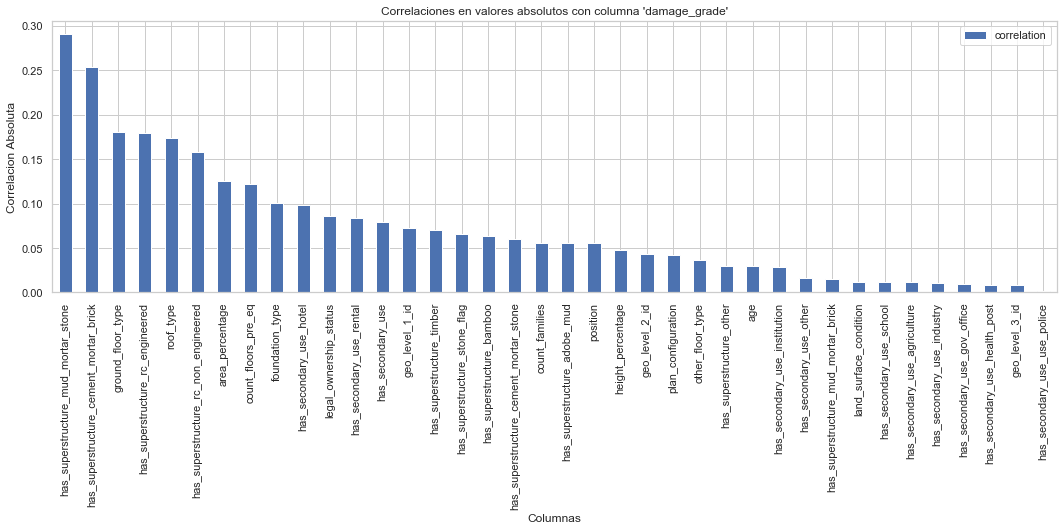

In [28]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = damage_correlation.abs()

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar()
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta")
ax.set_title("Correlaciones en valores absolutos con columna 'damage_grade'")

In [39]:
#Analisando el top 5 de columnas contra la gravedad del estado del edificio

In [74]:
gb_has_superstructure_mud_mortar_stone = data.groupby(['has_superstructure_mud_mortar_stone', 'damage_grade'])['damage_grade'].count()
gb_has_superstructure_mud_mortar_stone

has_superstructure_mud_mortar_stone  damage_grade
False                                1                16364
                                     2                34312
                                     3                11364
True                                 1                 8760
                                     2               113947
                                     3                75854
Name: damage_grade, dtype: int64

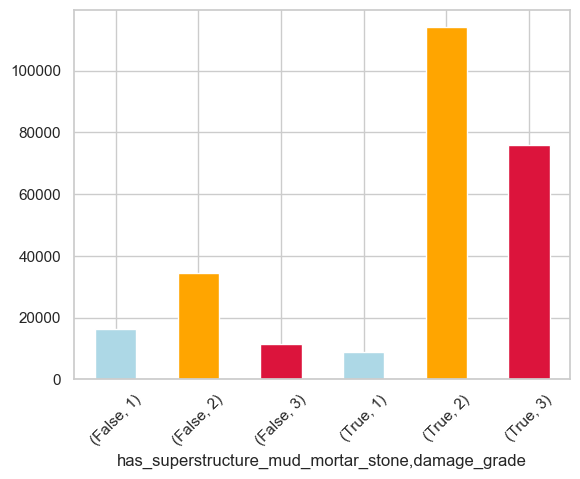

In [75]:
gb_has_superstructure_mud_mortar_stone.plot(x='has_superstructure_mud_mortar_stone',kind='bar', color=my_colors, rot=45)


In [77]:
gb_has_superstructure_cement_mortar_brick = data.groupby(['has_superstructure_cement_mortar_brick', 'damage_grade'])['damage_grade'].count()
gb_has_superstructure_cement_mortar_brick

has_superstructure_cement_mortar_brick  damage_grade
False                                   1                18019
                                        2               136838
                                        3                86129
True                                    1                 7105
                                        2                11421
                                        3                 1089
Name: damage_grade, dtype: int64

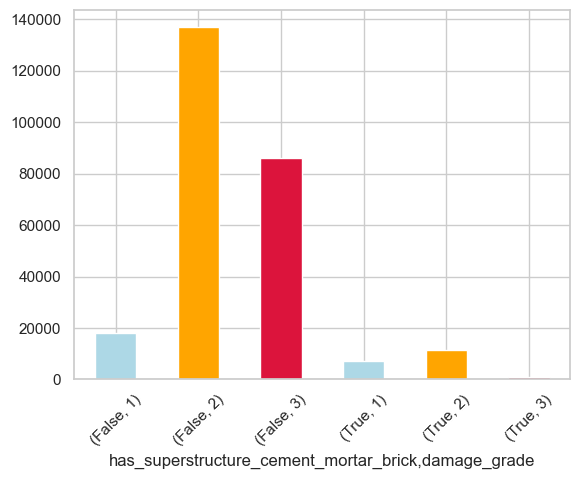

In [78]:
gb_has_superstructure_cement_mortar_brick.plot(x='has_superstructure_cement_mortar_brick',kind='bar', color=my_colors, rot=45)

In [81]:
gb_ground_floor_type = data.groupby(['ground_floor_type', 'damage_grade'])['damage_grade'].count()
gb_ground_floor_type

ground_floor_type  damage_grade
1.00               1                12474
                   2               119877
                   3                77268
2.00               1                   90
                   2                  343
                   3                   75
3.00               1                10309
                   2                12971
                   3                 1313
4.00               1                 2052
                   2                14536
                   3                 8289
5.00               1                  199
                   2                  532
                   3                  273
Name: damage_grade, dtype: int64

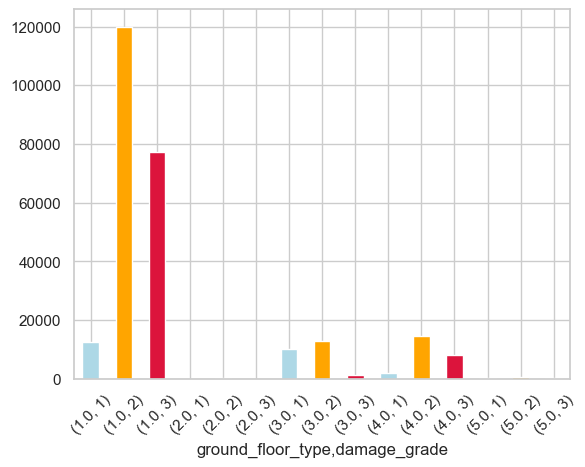

In [83]:
gb_ground_floor_type.plot(x='ground_floor_type',kind='bar', color=my_colors, rot=45)

In [84]:
gb_has_superstructure_rc_engineered = data.groupby(['has_superstructure_rc_engineered', 'damage_grade'])['damage_grade'].count()
gb_has_superstructure_rc_engineered

has_superstructure_rc_engineered  damage_grade
False                             1                22468
                                  2               146857
                                  3                87143
True                              1                 2656
                                  2                 1402
                                  3                   75
Name: damage_grade, dtype: int64

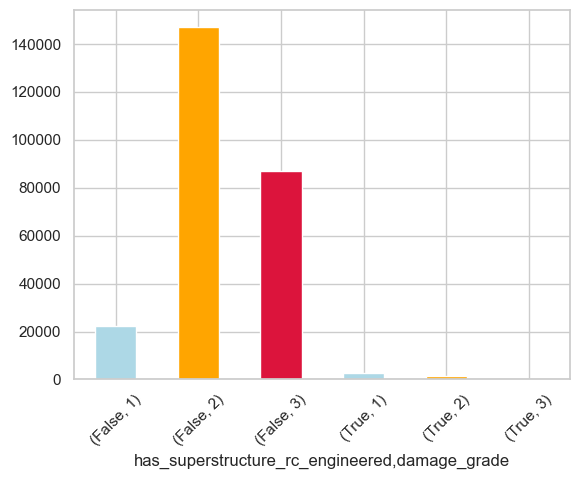

In [85]:
gb_has_superstructure_rc_engineered.plot(x='has_superstructure_rc_engineered',kind='bar', color=my_colors, rot=45)

In [86]:
gb_roof_type = data.groupby(['roof_type', 'damage_grade'])['damage_grade'].count()
gb_roof_type

roof_type  damage_grade
1.00       1                13547
           2               106447
           3                62848
2.00       1                 3926
           2                34009
           3                23641
3.00       1                 7651
           2                 7803
           3                  729
Name: damage_grade, dtype: int64

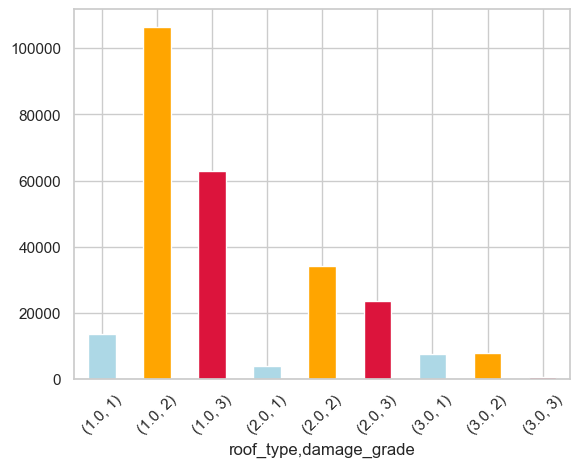

In [87]:
gb_roof_type.plot(x='roof_type',kind='bar', color=my_colors, rot=45)